# Importing Packages

In [103]:
import numpy as np
import keras

import sklearn.preprocessing as sklpre 
import sklearn.metrics as sklmet

import matplotlib.pyplot as plt

np.set_printoptions(threshold=20)

# Preprocessing Data

In [46]:
# Sample Data Loader
def getData(quantity, min_val, max_val, label):
    features = np.random.randint(min_val, max_val, (quantity, 1))
    labels = np.full((quantity, 1), label)
    return np.hstack((features, labels))

def getSamples(quantities, min_vals, max_vals, labels):
    data = np.empty((0, 2))
    for q, minv, maxv, label in zip(quantities, min_vals, max_vals, labels):
        data = np.vstack((data, getData(q, minv, maxv, label)))
    return data

The Example data have the following characteristics

* An experimental drug was tested on individuals from ages 13 to 100.
* The trial had 2100 participants. Half were under 65 years old, and half was over 65 years old.
* 95 % of patientes 65 or older experienced side effects
* 95 % of patientes under 65 experienced no side effects.

In [74]:
# Generating Sample Data
train_data = getSamples([1000, 1000, 50, 50], [13, 65, 13, 65], [64, 100, 64, 100], [0, 1, 1, 0])
test_data = getSamples([200, 200, 10, 10], [13, 65, 13, 65], [64, 100, 64, 100], [0, 1, 1, 0])

print(train_data.shape, test_data.shape)

(2100, 2) (420, 2)


In [80]:
# Scaling Data
scaler = sklpre.MinMaxScaler(feature_range=(0, 1))
train_data[:, [0]] = scaler.fit_transform(train_data[:, [0]])
test_data[:, [0]] = scaler.fit_transform(test_data[:, [0]])
print(train_data[0], test_data[0])

[0.18604651 0.        ] [0.55813953 0.        ]


# Generating Model

In [66]:
layers = [
    keras.layers.core.Dense(16, input_shape=(1,), activation='relu'),
    keras.layers.core.Dense(32, activation='relu'),
    keras.layers.core.Dense(2, activation='softmax'),
]
model = keras.models.Sequential(layers, name='Example Model')
model.summary()

Model: "Example Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile Model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer, loss=loss, metrics=metrics)

In [81]:
# Train the Model
train_features = train_data[:, [0]]
train_labels = train_data[:, [1]]
model.fit(train_features, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
 - 0s - loss: 0.2772 - accuracy: 0.9295
Epoch 2/20
 - 0s - loss: 0.2737 - accuracy: 0.9290
Epoch 3/20
 - 0s - loss: 0.2708 - accuracy: 0.9281
Epoch 4/20
 - 0s - loss: 0.2681 - accuracy: 0.9286
Epoch 5/20
 - 0s - loss: 0.2660 - accuracy: 0.9290
Epoch 6/20
 - 0s - loss: 0.2641 - accuracy: 0.9286
Epoch 7/20
 - 0s - loss: 0.2625 - accuracy: 0.9295
Epoch 8/20
 - 0s - loss: 0.2610 - accuracy: 0.9343
Epoch 9/20
 - 0s - loss: 0.2597 - accuracy: 0.9319
Epoch 10/20
 - 0s - loss: 0.2587 - accuracy: 0.9310
Epoch 11/20
 - 0s - loss: 0.2578 - accuracy: 0.9324
Epoch 12/20
 - 0s - loss: 0.2568 - accuracy: 0.9338
Epoch 13/20
 - 0s - loss: 0.2561 - accuracy: 0.9343
Epoch 14/20
 - 0s - loss: 0.2552 - accuracy: 0.9329
Epoch 15/20
 - 0s - loss: 0.2546 - accuracy: 0.9329
Epoch 16/20
 - 0s - loss: 0.2541 - accuracy: 0.9343
Epoch 17/20
 - 0s - loss: 0.2535 - accuracy: 0.9343
Epoch 18/20
 - 0s - loss: 0.2528 - accuracy: 0.9343
Epoch 19/20
 - 0s - loss: 0.2524 - accuracy: 0.9343
Epoch 20/20
 - 0s - l

# Test Model

In [91]:
# Generate Prediction Data
test_features = test_data[:, [0]]

pred_probs = model.predict(test_features, batch_size=10, verbose=0)
print(pred_probs * 100, end='\n\n')

pred_labels = model.predict_classes(test_features, batch_size=10, verbose=0)
print(pred_labels[:, np.newaxis])

[[52.173553  47.826447 ]
 [98.00121    1.9987822]
 [98.075874   1.9241309]
 ...
 [ 3.6380794 96.36192  ]
 [ 4.9283204 95.07168  ]
 [22.256292  77.743706 ]]

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


# Validate Predictions

In [95]:
cm = sklmet.confusion_matrix(test_data[:, [1]], pred_labels)
print(cm)

[[190  20]
 [ 10 200]]


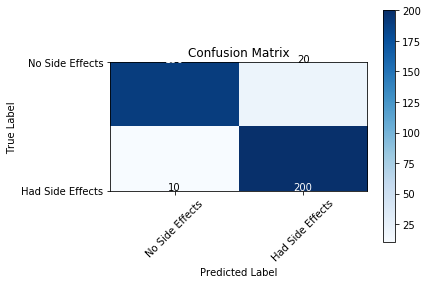

In [119]:
def plot_confusion_matrix(matrix, classes):
    plt.imshow(matrix, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    for r in range(matrix.shape[0]):
        for c in range(matrix.shape[1]):
            color = 'white' if matrix[r, c] > matrix.max() * 2/3 else 'black'
            plt.text(c, r, matrix[r, c], horizontalalignment='center', color=color)
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

labels = ['No Side Effects', 'Had Side Effects']
plot_confusion_matrix(cm, labels)